# Day 26: Introduction to Classification and Logistic Regression in Python

Let's build a **classifier**. If we have examples of items that go into our desired categories, we can train a model to guess the label of new data we encounter.

## What is Classification?

Classification in machine learning is a type of supervised learning where the goal is to predict the categorical labels of new observations based on past observations for which the labels are known. These categories can be binary, like determining whether an email is spam or not spam, or multi-class, like classifying a set of images into different categories such as dogs, cats, or birds.

At its core, **classification** aims to map input variables (features) to discrete outputs, generally represented as categories or classes. The function that performs this mapping is trained on a dataset containing inputs and the correct outputs. Mathematically, if we represent our input data as $X$ and the categories as $Y$, classification predicts $Y$ based on $X$.

Classification is paramount in numerous fields because it enables us to categorize data into distinct classes, facilitating easier analysis and decision-making. Its applications range from email filtering (spam vs. non-spam) to medical diagnosis (identifying diseases based on symptoms or scans). Accurate classification is crucial because it directly affects the efficiency and reliability of automated decisions in various industries, including finance, healthcare, and security.

## Applications and Examples

Classification techniques are applied in a multitude of domains. Here are a few noteworthy examples:

1. **Spam Detection**: Email services use classification to filter out unwanted emails from users' inboxes, ensuring that only relevant messages reach the recipient.
2. **Medical Diagnosis**: Machine learning models, trained with historical patient data, can classify whether a new patient's symptoms are indicative of a particular disease.
3. **Financial Fraud Detection**: Classification algorithms can detect patterns typical of fraudulent transactions, helping financial institutions prevent unauthorized access to accounts.
4. **Customer Sentiment Analysis**: Companies analyze customer feedback and classify them into positive, negative, or neutral sentiments to gauge overall customer satisfaction.

One prevalent method for tackling binary classification problems is called **Logistic Regression**.

## Logistic Regression

Logistic regression is a statistical and machine learning technique used for binary classification. Unlike linear regression, which outputs continuous values, logistic regression aims to predict a binary outcome (e.g., yes/no, 0/1).

The mathematical core of logistic regression is that it stays at a low, constant Y value until very rapidly switching to a high, constant Y value. This transition allows us to "divide" the X-axis between two labels (and isn't limited to two dimensions, but my visualizations mostly are).

This functionality allows logistic regression to estimate the probability that a given input belongs to a particular category (class 1), and by extension, not the other (class 0). Based on a threshold (usually 0.5), the model classifies each instance accordingly.

### Binary Classification vs. Multi-Class Classification

- **Binary Classification** is the simplest form of classification that deals with two distinct classes. The output label $y$ in binary classification is typically represented as 0 or 1, where each number corresponds to a class. Logistic regression is distinctly applicable for binary classification, but every multi-class classifier is capable of labeling just two classes as well.

- **Multi-Class Classification** involves categorizing data into more than two classes. In this case, the model's output layer must have as many neurons as there are classes, with each neuron representing a class. For example, a fruit classification model could distinguish among 'Apple', 'Banana', and 'Cherry'.

### Supervised Learning vs. Unsupervised Learning

- **Supervised Classification** involves training a model on a labeled dataset, where the correct output is known for each input data. The model learns to predict the output from the input data during the training process. This method is used for tasks like regression and classification, where the goal is to predict a continuous value or to categorize data into predefined labels, respectively. Examples of supervised learning algorithms include Linear Regression for regression tasks and Support Vector Machines for classification tasks.

- **Unsupervised Classification** does not rely on a labeled dataset for training. Instead, it aims to identify patterns or structures within the data without prior knowledge of the outcome. This method is used for clustering and association tasks, where the goal is to group similar data points together or to find rules that describe large portions of the data. Examples of unsupervised learning algorithms include K-means for clustering tasks and Apriori algorithm for association rule learning tasks.

Observe in this code example how different *classes* of synthetic data are created. We're randomizing "blobs" so we can test classifier algorithms on data with a known number of classes.

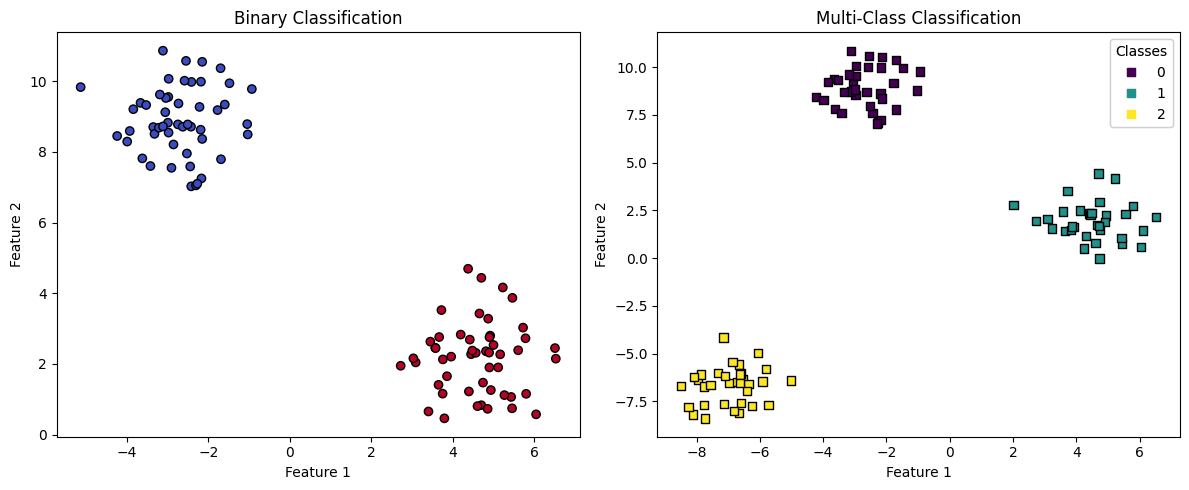

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generating synthetic data for binary classification
X_binary, y_binary = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
# Generating synthetic data for multi-class classification
X_multi, y_multi = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

# Creating a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plotting binary classification data
ax[0].scatter(X_binary[:, 0], X_binary[:, 1], c=y_binary, cmap=plt.cm.coolwarm, marker='o', edgecolor='k', label='Class')
ax[0].set_title('Binary Classification')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Plotting multi-class classification data
scatter = ax[1].scatter(X_multi[:, 0], X_multi[:, 1], c=y_multi, cmap=plt.cm.viridis, marker='s', edgecolor='k', label='Class')
ax[1].set_title('Multi-Class Classification')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

# Adding a legend for the multi-class plot
legend1 = ax[1].legend(*scatter.legend_elements(), title="Classes")
ax[1].add_artist(legend1)

plt.tight_layout()
plt.show()

# Interpretation
# The left subplot illustrates a binary classification dataset with two distinct classes,
# shown by the two colors. Points represent data points, classified into one of the two classes.
# The right subplot shows a multi-class classification dataset with three distinct classes. 
# Similar to binary classification, each color represents a different class. However, in this 
# case, there are more than two classes, highlighting the complexity and variety in multi-class scenarios.



# The Logistic Function (Sigmoid Function)

The Logistic Function, also known as the Sigmoid Function, forms the cornerstone of certain models in statistics and machine learning, particularly in logistic regression. It is renowned for its ability to map any real-valued number into a value between 0 and 1, making it suitable for applications that require probability estimations.

## What is the Logistic Function?

The logistic function is a mathematical function having a characteristic "S"-shaped curve (sigmoid curve). It is formally defined by the formula:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Here, $z$ represents any real number, $e$ is the base of the natural logarithm (approximately equal to 2.71828), and $\sigma(z)$ is the output value bounded between 0 and 1.

### Definition

At its core, the logistic function can be understood as a method of converting linear combinations of variables into values that lie between 0 and 1. This conversion is pivotal when dealing with probabilities, as probabilities are inherently restricted to values within this range.

### Importance

The logistic function's importance stems from its ability to model probabilities. In fields such as statistics and machine learning, predicting outcomes is often binary, such as 'yes or no,' 'true or false,' or 'success or failure.' The logistic function enables the prediction of the probability that a given input point belongs to a particular category. 

By outputting values between 0 and 1, the logistic function's results can be directly interpreted as probabilities. For example, if $\sigma(z) = 0.75$ for a specific data point in a binary classification problem, it suggests a 75% probability of this point belonging to the '1' or 'positive' category. This interpretability is crucial for making decisions in various applications across fields such as finance, healthcare, and social sciences, where understanding the likelihood of an event is more meaningful than merely predicting its occurrence.

## Applications and Examples

The logistic function is the mathematical core of logistic regression models, used for binary classification problems. In such models, the logistic function takes a linear combination of input features and maps this value to a probability score indicating the likelihood of the instance being in the positive class (often denoted as '1').

### Financial Sector

In finance, the logistic function helps in credit scoring models to estimate the probability of a borrower defaulting on a loan. By inputting factors such as income, debt ratio, and credit history into a logistic regression model, lenders can predict the likelihood of default. A score closer to 1 indicates a higher chance of default, aiding in risk assessment and decision-making about loan approvals.

### Healthcare

In healthcare, logistic regression models employing the logistic function can predict patient outcomes. For instance, by analyzing patient data like age, gender, and medical history, these models can estimate the probability of a patient developing a particular disease. This assists doctors in diagnosing and planning treatment strategies more effectively.

### Social Sciences

In the realm of social sciences, researchers use logistic regression to understand behavior and outcomes. For example, by studying data on educational background, socioeconomic status, and test scores, a model can predict the likelihood of a student's success in college.

In summary, the logistic or sigmoid function is vital for transforming linear relationships into probabilities. This transformation is especially beneficial in domain-specific applications where outcomes are binary, and understanding the odds or likelihood of those outcomes is crucial for making informed decisions.


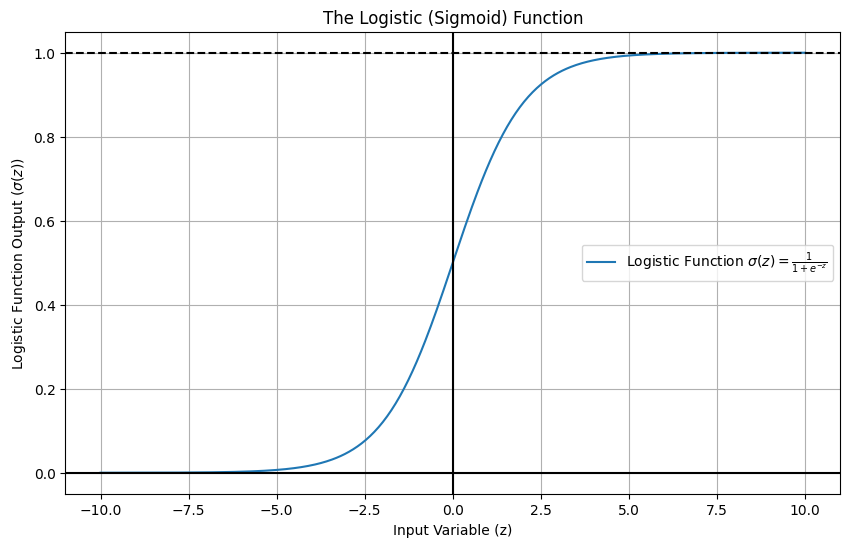

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Data generation: Generating an array of values from -10 to 10 for input variable z
z = np.linspace(-10, 10, 500)

# Logistic Function/Sigmoid Function Implementation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Applying the logistic function to each value in our input variable array
sigma_z = sigmoid(z)

# Visualization: Plotting the Logistic Function
plt.figure(figsize=(10, 6))
plt.plot(z, sigma_z, label='Logistic Function $\sigma(z) = \\frac{1}{1 + e^{-z}}$')

# Enhancing the plot
plt.title('The Logistic (Sigmoid) Function')
plt.xlabel('Input Variable (z)')
plt.ylabel('Logistic Function Output ($\sigma(z)$)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k', linestyle='-')  # X-axis
plt.axhline(y=1, color='k', linestyle='--')  # Horizontal line at y=1
plt.axvline(x=0, color='k', linestyle='-')  # Y-axis
plt.legend()
plt.show()

# Interpretation: This visualization shows the S-shaped curve of the Logistic Function, 
# highlighting how it effectively maps input values (z) to a range between 0 and 1, 
# making it suitable for probability estimation in binary classification problems.



## Hey, How Does That Curvy Thing Draw Straight Lines Through My Data?

The sigmoid curve here is being drawn on **One Dimensional data** that's divided into **binary categories**. We often visualize the class of a data point as a zero or one, which puts the data points on the 0.0 line of the Y-axis, or the 1.0 line. But without the labels, the data you see when putting your model into inference, would just be *unlabeled, one-dimensional numbers along the number line*.

The curve you see is logistic regression's determination of the probability of being in the "$y=1.0$" class. The class determination it makes is an additional dimension to the data. While the labels are discrete (zero or one), the probability is continuous. This is why we need the cutoff value ($0.5$) to determine the difference between our two classes.

Now let's move to two dimensions. In that case, our data is not a number line, it's a plane ($X_1$ and $X_2$). The logistic regression uses both of these as input, and adds an additional dimension: a bottom plane and a top plane for our class labels. The continuous probability curve is still present: but it transitions along a straight line from one class to the other (where the probability curve passes the threshold of $0.5$).

## Example

In this example, we will:

* Generate 1D synthetic data
* Fit an logistic regression model to it
* plot the data points and the logistic curve of our model

In [28]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate binary classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on testing set
y_pred = model.predict(X_test)

# Evaluate model performance (of course it's good, this is clean, synthetic data!)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


Intercept: -3.3542282703242288
Coefficients: [1.09648581]


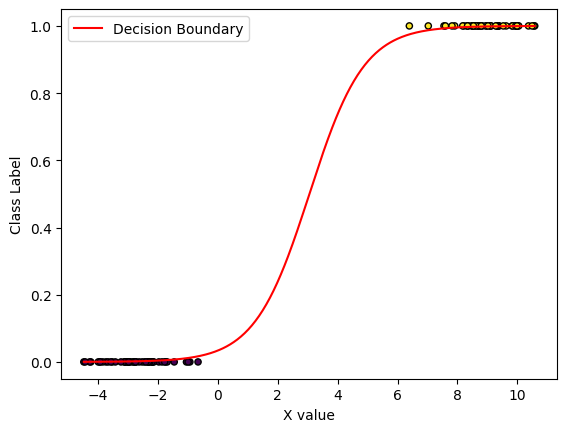

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X[:, 0], 
            [1.0 if cls else 0.0 for cls in y], # Our 1D data needs a "1.0" or "0.0" y-value based on its class.
            c=y, cmap='viridis', edgecolor='k', s=20)

intercept = model.intercept_[0]
coefficients = model.coef_[0]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Logistic regression line: 500 points in our data's range, and a prediction for each one
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 500)
y_values = model.predict_proba(x_values.reshape(-1, 1))[:, 1]

# Plot the decision boundary
plt.plot(x_values, y_values, label='Decision Boundary', color='red')

plt.xlabel('X value')
plt.ylabel('Class Label')
plt.legend()
plt.show()


# Exercise For The Reader: Implementing a (Less) Simple Logistic Regression Model

The 1D example above demonstrate the principle of Logistic Regression. But most data is above one dimension. Take this starter code and run with it: attempt to apply it to a dataset.

**Exercise Overview:**

1. **Load a Dataset:** You will use a pre-processed dataset provided for this exercise. The dataset will include features (independent variables) and a target binary variable indicating the category to which each record belongs.
2. **Data Preprocessing:** Before fitting the model, you may need to perform some data preprocessing steps such as splitting the dataset into training and test sets, and possibly normalizing or standardizing the features.
3. **Model Fitting:** You will use the `LogisticRegression` class from `scikit-learn` to fit the model to your training data.
4. **Prediction:** After fitting the model, you will use it to predict the outcomes (categories) of the test set.
5. **Performance Evaluation:** Finally, you'll evaluate the model's performance using metrics such as accuracy, precision, recall, and the F1 score.


Accuracy: 0.905
Precision: 0.968421052631579
Recall: 0.8518518518518519
Confusion Matrix:
 [[89  3]
 [16 92]]


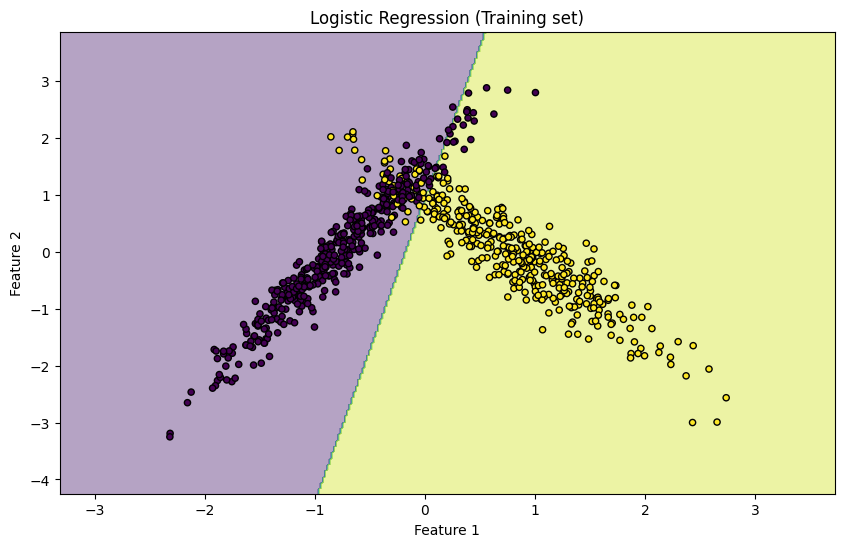

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.5], flip_y=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:\n", conf_matrix)

# Visualization
plt.figure(figsize=(10, 6))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('Logistic Regression (Training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()





This code segments perform the following tasks:

1. **Data Generation/Loading**: Generates a synthetic dataset suitable for binary classification using `make_classification` from `sklearn.datasets`.
2. **Data Preprocessing**: Splits the dataset into training and testing sets, and standardizes the features for optimal performance.
3. **Model Fitting**: Fits a logistic regression model using `LogisticRegression` from `scikit-learn` on the training data.
4. **Prediction and Evaluation**: Uses the fitted model to predict the outcomes of the test data and evaluates the performance using accuracy, precision, recall, and confusion matrix.
5. **Visualization**: Plots the training data and the decision boundary of the trained logistic regression model to visually interpret how well the model has learned to separate the two classes.
